# Gênero da voz

Reconhecimento de gênero por voz e análise de fala.

O dataset utilizado neste notebook foi criado para identificar vozes de homens ou mulheres, com base nas propriedades acústicas da voz e da fala. O conjunto de dados consiste em 3.168 amostras de vozes gravadas. As amostras de voz são pré-processadas por análise acústica em R.

Dataset

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female



# Importamos as bibliotecas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Lemos os arquivo CSV

In [6]:
df = pd.read_csv('./input/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Checamos a correlação entre todas as features

In [32]:
corr = df.corr()
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


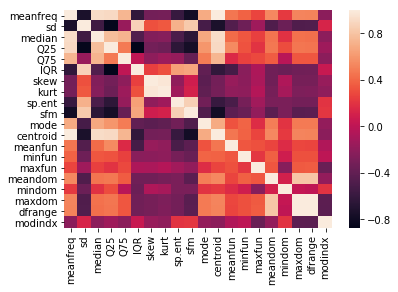

In [33]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Checo se há algum valor null

In [35]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [36]:
df.shape #dimensão do dataframe


(3168, 21)

In [37]:
print("Numero total de rotulos: {}".format(df.shape[0]))
print("Numero de machos: {}".format(df[df.label == 'male'].shape[0]))
print("Numero de fêmeas: {}".format(df[df.label == 'female'].shape[0]))

Numero total de rotulos: 3168
Numero de machos: 1584
Numero de fêmeas: 1584


# Separando features e labels

In [38]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


# Convertendo String para int nos labels

In [41]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Definimos Encoder
# male -> 1      (para macho)
# female -> 0    (para fêmea)

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

# Padronização do dados.

A padronização refere-se a deslocar a distribuição de cada atributo para ter uma média zero e um desvio padrão de uma unidade (variância unitária). É útil padronizar atributos para um modelo. A padronização de conjuntos de dados é um requisito comum para muitos estimadores de aprendizado de máquinas implementados em scikit-learn; eles podem se comportar mal se os recursos individuais não aparecem mais ou menos como dados padrão normalmente distribuídos.


In [44]:
# Escala os dados com média 0.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ..., 
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

# Dividimos o dataset em conjunto de treinamento e de teste

In [45]:
# 20% para teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Rodamos SVM com hiperparâmetros Default

In [46]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Score da Acurária:')
print(metrics.accuracy_score(y_test,y_pred))

Score da Acurária:
0.976340694006


# Com kernel linear default 

In [47]:
svc=SVC(kernel='linear')

svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Score da Acurária:')
print(metrics.accuracy_score(y_test,y_pred))

Score da Acurária:
0.977917981073


# Default kernel RBF

In [48]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Score da Acurária:')
print(metrics.accuracy_score(y_test,y_pred))

Score da Acurária:
0.976340694006


O Kernel default utiliza o kernel RBF.

# Com kernel Polynomial Default 

In [49]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Score da Acurária:')
print(metrics.accuracy_score(y_test,y_pred))

Score da Acurária:
0.958990536278


Com kernel polinomial talvez teve overfitting.

# Agora com k-fold cross validation

# CV no kernel Linear

In [50]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear')

scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.91194969  0.97169811  0.97169811  0.97169811  0.96202532  0.98734177
  0.99050633  0.98101266  0.95253165  0.99367089]


A acuracia vai depender de como o dataset é dividido.

Tirando a média dos scores usando Cross validation.

In [52]:
print(scores.mean())

0.969413263275


# CV com kernel rbf 

In [53]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[ 0.93396226  0.95597484  0.96855346  0.9591195   0.96835443  0.99683544
  0.98734177  0.98101266  0.91455696  0.99367089]


In [54]:
print(scores.mean())

0.965938221479


# CV on Polynomial kernel

In [55]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[ 0.89937107  0.94654088  0.93081761  0.91509434  0.95886076  1.
  0.98101266  0.96835443  0.87974684  0.9778481 ]


In [56]:
print(scores.mean())

0.945764668418


### Testando valores de C e com kernel linear

O parâmetro C indica a otimização do SVM, quanto você deseja evitar a classificação errada de cada exemplo de treinamento. C grande pode causar overfitting e C pequeno underfitting.

In [57]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
print(acc_score)    

[0.96941326327521682, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96941326327521682, 0.96909879786641184, 0.96878433245760687, 0.96846986704880178, 0.96846986704880178, 0.96846986704880178, 0.96846986704880178, 0.96815341135259914, 0.96815341135259914, 0.96815341135259914, 0.96815341135259914, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.96815341135259914, 0.96846787676140433, 0.96846787676140433, 0.9681514210652018, 0.9681514210652018]


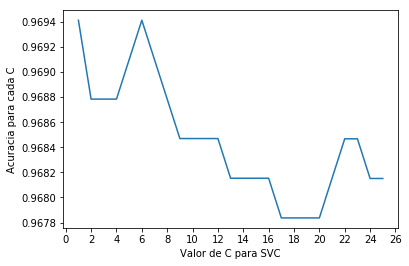

In [59]:
import matplotlib.pyplot as plt


C_values=list(range(1,26))

plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Valor de C para SVC')
plt.ylabel('Acuracia para cada C')

Melhor acurária foi para C=1 e C=6

### Vamos variar entre 1 e 6, com passo de 0.1

In [60]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
print(acc_score)    

[0.97004816495501944, 0.96910078815380951, 0.96909879786641184, 0.96909879786641184, 0.96941326327521682, 0.96941326327521682, 0.96972772868402191, 0.96941127298781937, 0.9690968075790144, 0.96941326327521682, 0.96941326327521682, 0.96941326327521682, 0.96941326327521682, 0.96878234217020953, 0.96909879786641184, 0.96909879786641184, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96909879786

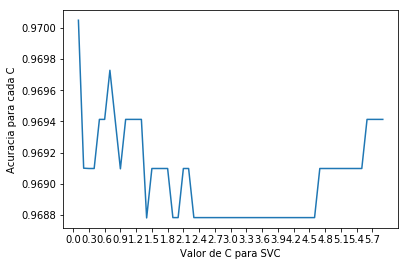

In [61]:
import matplotlib.pyplot as plt

C_values=list(np.arange(0.1,6,0.1))

plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Valor de C para SVC')
plt.ylabel('Acuracia para cada C')

Acurarica mais alta para C=0.1.

### Rodando para kernel RBF, variando gamma

Tecnicamente, o parâmetro gamma é o inverso do desvio padrão do kernel RBF (função Gaussiana), que é usado como medida de similaridade entre dois pontos. Intuitivamente, um pequeno valor gama define uma função gaussiana com uma grande variação. Neste caso, dois pontos podem ser considerados semelhantes mesmo se estão longe um do outro. Por outro lado, um grande valor de gama significa definir uma função gaussiana com uma variância pequena e neste caso, dois pontos são considerados similares apenas se eles estão próximos.

In [62]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
print(acc_score)    

[0.88781147997770871, 0.95524639757981067, 0.9681514210652018, 0.96309609107555116, 0.9072366849773108, 0.59553777565480459, 0.5]


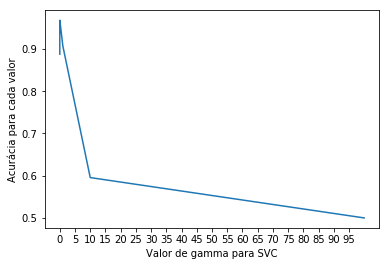

In [65]:
import matplotlib.pyplot as plt

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Valor de gamma para SVC')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Acurácia para cada valor')

Vamos olhar em detalhes entre 0.0001 to 0.1.

In [67]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
print(acc_score)    

[0.88781147997770871, 0.95524639757981067, 0.9681514210652018, 0.96309609107555116]


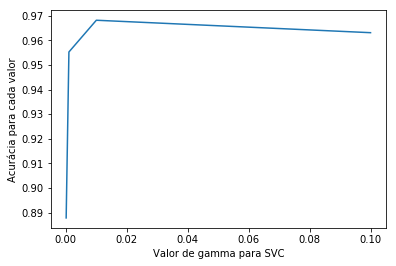

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

plt.plot(gamma_range,acc_score)
plt.xlabel('Valor de gamma para SVC')
plt.ylabel('Acurácia para cada valor')

Variando, agora, ente 0,01 e 0,05

In [69]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
print(acc_score)        

[0.9681514210652018, 0.96783894594379449, 0.96783496536899916, 0.96688957885518645, 0.96593822147918151]


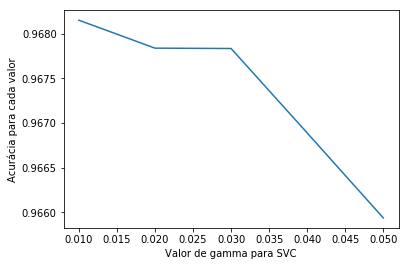

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

plt.plot(gamma_range,acc_score)
plt.xlabel('Valor de gamma para SVC')
plt.ylabel('Acurácia para cada valor')

gamma=0.01 parace ser o melhor parametro. Valor default é 1/num_features, no caso é 1/20 = 0.05

# Pegando kernel polynomial e variando o degree

In [71]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
print(acc_score)    

[0.85069262001432988, 0.94576466841811957, 0.83121168696759806, 0.86598200780192658, 0.77475718493750489]


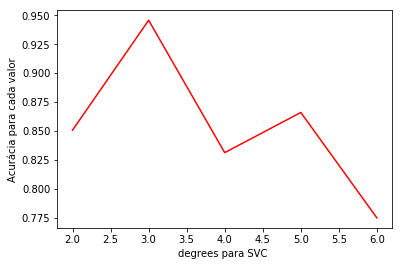

In [72]:
import matplotlib.pyplot as plt

degree=[2,3,4,5,6]

plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees para SVC ')
plt.ylabel('Acurácia para cada valor')

Maior valor para polinomia terceiro grau.

# SVM com C=0.1 e kernel linear


In [73]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)

svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

accuracy_score= metrics.accuracy_score(y_test,y_predict)

print(accuracy_score)

0.97476340694


# usando cross validation

In [74]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.90880503  0.97169811  0.97484277  0.96855346  0.96202532  0.99050633
  0.99050633  0.98101266  0.95886076  0.99367089]


Média dos scores

In [75]:
print(scores.mean())

0.970048164955


# Agora com gamma=0.01 e kernel RBF 

In [76]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)

y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.96687697160883279

# usando cross validation

In [78]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print(scores)
print("Média %s" %scores.mean())

[ 0.91194969  0.97169811  0.97169811  0.97169811  0.96202532  0.98734177
  0.99050633  0.98101266  0.95253165  0.99367089]
Média 0.969413263275


# degree =3 e kernel poly

In [79]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.958990536278


# Com cross validation

In [80]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print(scores)
print(scores.mean())

[ 0.89937107  0.94654088  0.93081761  0.91509434  0.95886076  1.
  0.98101266  0.96835443  0.87974684  0.9778481 ]
0.945764668418


# Vamos fazer uma busca com grid

In [81]:
from sklearn.svm import SVC
svm_model= SVC()

In [82]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']}

In [88]:
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [84]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9569850039463299


In [85]:
print(model_svm.grid_scores_)

[mean: 0.72612, std: 0.02657, params: {'C': 0.10000000000000001, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, mean: 0.66732, std: 0.01472, params: {'C': 0.10000000000000001, 'degree': 2, 'gamma': 0.02, 'kernel': 'poly'}, mean: 0.73639, std: 0.02183, params: {'C': 0.10000000000000001, 'degree': 2, 'gamma': 0.03, 'kernel': 'poly'}, mean: 0.79242, std: 0.02043, params: {'C': 0.10000000000000001, 'degree': 2, 'gamma': 0.04, 'kernel': 'poly'}, mean: 0.82952, std: 0.02263, params: {'C': 0.10000000000000001, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly'}, mean: 0.57893, std: 0.01547, params: {'C': 0.10000000000000001, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}, mean: 0.88477, std: 0.01732, params: {'C': 0.10000000000000001, 'degree': 3, 'gamma': 0.02, 'kernel': 'poly'}, mean: 0.89227, std: 0.01451, params: {'C': 0.10000000000000001, 'degree': 3, 'gamma': 0.03, 'kernel': 'poly'}, mean: 0.90489, std: 0.01413, params: {'C': 0.10000000000000001, 'degree': 3, 'gamma': 0.04, 'kernel': 'poly'}, 

In [86]:
print(model_svm.best_params_)

{'C': 0.90000000000000002, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [1]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.99128990536278
